In [5]:
import re
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sys.path.append('/home/kushal/Desktop/Corpus')

from scripts.stopwords import STOP_WORDS
from nltk import FreqDist
stop_words = set(STOP_WORDS)
import os

DATA_FOLDER = "../data"

output_files = [
    # "nepali_c1.txt",
    # "nepali_c2.txt",
    # "nepali_c3.txt",
    "nepali_c4.txt",
    # "nepali_c5.txt",
    # "nepali_c6.txt",
]


for output_file in output_files:
    # Construct the full path to the output file
    full_output_path = os.path.join(DATA_FOLDER, output_file)

    with open(full_output_path, "r", encoding="utf-8") as file:
        text = file.read()
        print(text[:1000])

प्रदेश प्रहरी कार्यालय कोशीद्वारा ५२ करोड राजस्व सङ्कलन विराटनगर । कोशी प्रदेश प्रहरी कार्यालयले आर्थिक वर्ष २०७९/८० मा प्रदेश भरिमा विभिन्न घटनाका आठ हजार सात सय १९ मुद्दा दर्ता भई दुई  हजार सात सय ७३ फर्छ्यौट गरेको छ ।
सो अवधिमा रु ५२ करोड १७ लाख ७८ हजार राजस्व सङ्कलन भएको प्रदेश प्रहरी प्रमुख प्रहरी नायब महानिरीक्षक राजेशनाथ बाँस्तोलाले वार्षिक कार्यसम्पादन समीक्षा प्रगति विवरण प्रस्तुत गर्दै जानकारी दिएका हुन ।
गत आवमा आठ हजार सात सय १९ विभिन्न अपराधसम्बन्धी मुद्दा दर्ता भई कानूनी कारबाही भइरहेको तथा फैसला कार्यान्वयन तर्फ विभिन्न अपराधमा सजाय एवं जरिवाना फैसला भई फरार रहँदै आएका एक हजार चार सय ६६ जना फरार प्रतिवादी पक्राउ गरिएको र रु चार करोड २४ लाख १२ हजार राजस्व सङ्कलन भएको प्रहरी प्रमुख बाँस्तोलाले जानकारी दिए ।
यसैगरी भन्सार चोरी निकासी तर्फ अवैध रुपमा सामान चोरी निकासी गर्ने एक सयजना मानिस पक्राउ गर्नुका साथै रु २६ करोड ९८ लाख ३८ हजार नौ सय ८० राजस्व भएको जनाइएको छ ।
यस्तै नदीजन्य पदार्थको अवैध रुपमा दोहन गर्ने ७४ व्यक्ति र तीन सय ३३ नदीजन्य पदार्थ उत्खनन गर्ने तथा ओसारपसार ग

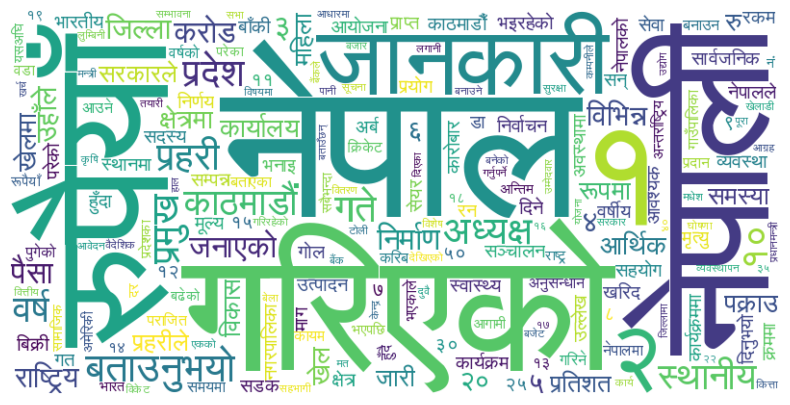

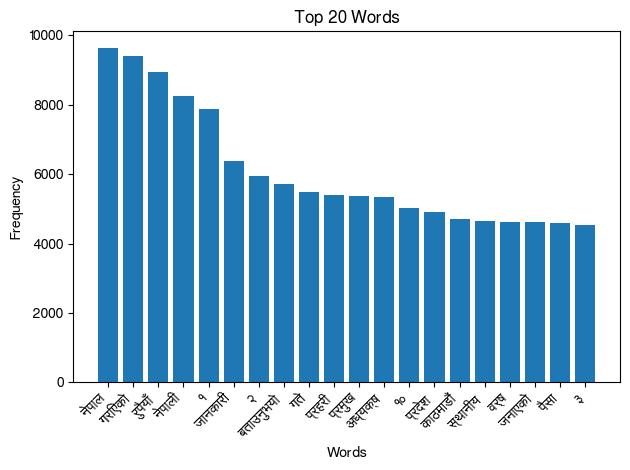

In [7]:
""" This is done to avoid the concurrent repetition of "।" in the text which leads to the repetition of the same word in the wordcloud. """
text = text.replace("।", " ")

""" Set the font globally for matplotlib to render nepali characters"""
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Gargi']

"""Remove the non-nepali words and stopwords from the text"""
nepali_words = [word for word in re.findall(r'[\u0900-\u097F]+', text) if word not in stop_words]

word_freq = FreqDist(nepali_words)

""" Plot the wordcloud for the text"""
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="/home/kushal/Videos/Corpus Preprocess/font/gargi.ttf").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

""" Plot the bar plot for the top N words """
top_n = 20
top_words = dict(word_freq.most_common(top_n))

plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Words'.format(top_n))

plt.tight_layout()
plt.show()
